<a href="https://colab.research.google.com/github/JVChaparroUniandes/Talleres_Analisis_Machine_Learning/blob/main/Taller_1_Grupo_4_An%C3%A1lisisMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%201/Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

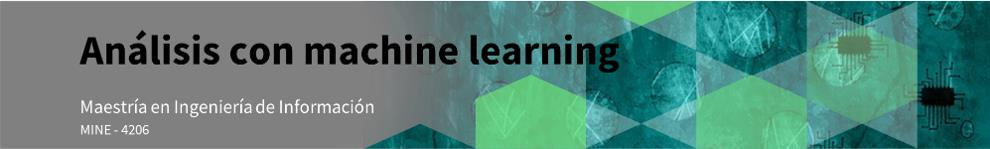

- **Integrante 1:**
- **Integrante 2:**

---
# Contexto y objetivos.

Para la gestión de riesgos ambientales, la organización espera la construcción de un modelo predictivo que permita determinar la demanda sobre el uso de un sistema de alquiler de bicicletas. Este conocimiento puede dar soporte para mejorar el servicio y conocer los factores que inciden en su eficiencia. Fomentar planes de movilidad sostenible es una manera de reducir las emisiones de CO2, que afectan la temperatura del planeta y desequilibran el ciclo natural.

**Objetivos**:
* Aplicar técnicas de regresión para construir un modelo predictivo que permita estimar la demanda sobre el uso de un sistema de alquiler de bicicletas siguiendo el ciclo de machine learning.
* Determinar cuáles son los factores que más inciden en la demanda con base en los datos.

**Datos**: Información original obtenida de [rental-bike-sharing](https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing), ten en cuenta que los datos cuentan con algunas modificaciones.

# Entendimiento del negocio.

El conjunto de datos recoge información sobre la cantidad de bicicletas rentadas en un período de tiempo, junto con información meteorológica y de temporalidad, entre otros. Es importante que revises el diccionario como primer paso para comprender estos datos.


Con apoyo de la organización ha sido posible elaborar el siguiente diccionario de datos:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **season** | Estación del año (Winter, Spring, Summer, Fall). |
| **weekday** | Día de la semana (de 1 a 7). |
| **weathersit** | Clima (*Clear*, *Mist*, *Light Rain*, *Heavy Rain*). |
| **temp** | Temperatura. |
| **atemp** | Sensación de temperatura. |
| **hum** | Humedad. |
| **windspeed** | Velocidad del viento. |
| **cnt** | Cantidad de bicicletas rentadas. |
| **time_of_day** | Parte del día (*Morning*, *Evening*, *Night*). |

# Actividades a realizar.

1.   Explorar y perfilar los datos, utilizando las funcionalidades de la librería pandas. Recuerda que este paso es muy importante para determinar problemas de calidad (*por ejemplo, valores ausentes y registros duplicados*) y tomar decisiones relacionadas con la preparación de los datos para el algoritmo de aprendizaje.
2.	Limpiar y preparar los datos, justificando las decisiones tomadas con base en los resultados obtenidos en el paso anterior.
3.	Construir un modelo de regresión polinomial. Para determinar el grado de la transformación polinomial, emplea las técnicas de selección de modelos sobre los siguientes valores de grado de polinomio: [2, 3, 4]. Utiliza para la selección la métrica RMSE.
4.	Construir un modelo de regresión regularizada Lasso. Para determinar el valor del hiperparámetro de regularización utiliza las técnicas de selección de modelos sobre los siguientes valores para α: [0.01, 0.1, 1, 2, 3, 4, 5]. Utiliza para la selección la métrica RMSE.
5.	Elaborar una tabla comparativa mostrando el rendimiento sobre test de los dos modelos seleccionados (con mejores rendimientos) de las actividades 3 y 4, con las métricas R2, RMSE y MAE. ¿Cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?
6.	Determinar el *mejor* modelo Lasso con las variables más importantes para la predicción. A partir de estas, ¿qué interpretación de cara al problema puedes dar?. Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.


#Instalación de librerías

Instalamos la librería pandas profiling que usaremos para el análisis de los datos

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.8 MB 9.9 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=f28d44184e3635f8c85d9836c85d7901be17f675232e27ae380026e6f85ce5c8
  Stored in directory: /tmp/pip-ephem-wheel-cache-tm_it5sf/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=24cf0f2bab6b36ba44bcfad42592ba5188dfa531e2b25499b7e63a26e302cb39
  Stored in directory

#Importación de librerías

In [ ]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector

#Introducción a los Datos

In [ ]:
#Especificamos la ruta donde se encuentran los datos
ruta_datos="/content/renta-bic.csv"
#Leemos los datos y creamos un df
df_bicis=pd.read_csv(ruta_datos)

In [ ]:
#Primera inspección de los datos
df_bicis.head(20)

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,3.0014,0.81,0.0000,16,Night
1,Winter,6,Clear,2.34,1.9982,0.80,0.0000,40,Night
2,Winter,6,Clear,2.34,1.9982,0.80,0.0000,32,Night
3,Winter,6,Clear,3.28,3.0014,0.75,0.0000,13,Night
4,Winter,6,Clear,3.28,3.0014,0.75,0.0000,1,Night
5,Winter,6,Mist,3.28,1.0016,0.75,6.0032,1,Morning
6,Winter,6,Clear,2.34,1.9982,0.80,0.0000,2,Morning
7,Winter,6,Clear,1.40,1.0016,0.86,0.0000,3,Morning
8,Winter,6,Clear,3.28,3.0014,0.75,0.0000,8,Morning
9,Winter,6,Clear,7.04,7.0010,0.76,0.0000,14,Morning


In [ ]:
#Analizamos el tamaño del dataset
df_bicis.shape

(17379, 9)

Realizamos como primera medida la división de los datos de entrenamiento y prueba. Se escogió la semilla 42

In [ ]:
#Procedemos a dividir los datos de eentrenamiento y test
train,test=train_test_split(df_bicis,test_size=0.2,random_state=42)

In [ ]:
#Analizamos el resultado de la división
train.head(10)

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
335,Winter,6,Clear,1.40,-2.9980,0.55,15.0013,72,Morning
7035,Fall,2,Clear,16.44,17.0000,0.42,7.0015,518,Evening
8051,Fall,3,Light Rain,13.62,13.9970,1.00,15.0013,3,Night
2133,Spring,0,Mist,13.62,13.9970,0.31,0.0000,172,Evening
8485,Winter,0,Clear,1.40,-0.9982,0.75,7.0015,1,Morning
12587,Spring,3,Clear,25.84,26.9990,0.30,32.9975,392,Evening
399,Winter,2,Mist,2.34,-0.9982,0.87,11.0014,35,Evening
15527,Fall,0,Clear,11.74,11.9972,0.77,19.0012,12,Night
10546,Winter,2,Clear,20.20,22.0028,0.78,12.9980,284,Evening
749,Winter,4,Clear,2.34,-2.9980,0.37,22.0028,60,Evening


La primera aproximación que nos dan los datos es que la variable categórica de días está clasificada por números. Esto nos puede representar un problema para el modelo, razón por la cual vamos a reemplazar con el siguiente código los días numéricos por los días en palabras.

In [ ]:
#Estandarizamos el día de la semana
#El domingo estaba catalogado no como 7 sino como 0
train["weekday"]=train["weekday"].replace([0],[7])
train["weekday"]=train["weekday"].replace([1,2,3,4,5,6,7],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

Observamos el resultado del arreglo:

In [ ]:
train.head(20)

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
335,Winter,Saturday,Clear,1.40,-2.9980,0.55,15.0013,72,Morning
7035,Fall,Tuesday,Clear,16.44,17.0000,0.42,7.0015,518,Evening
8051,Fall,Wednesday,Light Rain,13.62,13.9970,1.00,15.0013,3,Night
2133,Spring,Sunday,Mist,13.62,13.9970,0.31,0.0000,172,Evening
8485,Winter,Sunday,Clear,1.40,-0.9982,0.75,7.0015,1,Morning
12587,Spring,Wednesday,Clear,25.84,26.9990,0.30,32.9975,392,Evening
399,Winter,Tuesday,Mist,2.34,-0.9982,0.87,11.0014,35,Evening
15527,Fall,Sunday,Clear,11.74,11.9972,0.77,19.0012,12,Night
10546,Winter,Tuesday,Clear,20.20,22.0028,0.78,12.9980,284,Evening
749,Winter,Thursday,Clear,2.34,-2.9980,0.37,22.0028,60,Evening


##Exploración básica de la información

In [ ]:
#Exploramos los nombres de las columnas
train.columns

Index(['season', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'time_of_day'],
      dtype='object')

In [ ]:
#Observamos la composición de cada columna
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 335 to 15795
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       13903 non-null  object 
 1   weekday      13903 non-null  object 
 2   weathersit   13903 non-null  object 
 3   temp         13903 non-null  float64
 4   atemp        13903 non-null  float64
 5   hum          13903 non-null  float64
 6   windspeed    13903 non-null  float64
 7   cnt          13903 non-null  int64  
 8   time_of_day  13903 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


Lo primero que observamos es que no tenemos datos nulos y que tendremos 4 variables categoricas y 4 variables no categóricas.

In [ ]:
#Sacamos la información descriptiva
train.describe()

,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,15.377624,15.428076,0.627011,12.718082,190.577070
std,9.071776,11.372345,0.192801,8.193602,182.220507
min,-7.060000,-16.000000,0.000000,0.000000,1.000000
25%,7.980000,5.997800,0.470000,7.001500,39.000000
50%,15.500000,15.996800,0.630000,11.001400,143.000000
75%,23.020000,24.999200,0.780000,16.997900,282.000000
max,39.000000,50.000000,1.000000,56.996900,976.000000


In [ ]:
#Miramos el tamaño en detalle del dataset
print(f"El número de carcteristicas es de {train.shape[1]} y el número de datos es de {train.shape[0]}")

El número de carcteristicas es de 9 y el número de datos es de 13903


In [ ]:
#Miramos los valores nulos por columna
train.isnull().sum()

season         0
weekday        0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
cnt            0
time_of_day    0
dtype: int64

##Análisis exploratorio de datos(EDA)

realizamos un pairplot que nos permita observar el comportamiento de las variables no categóricas.

<Figure size 2500x2000 with 0 Axes>

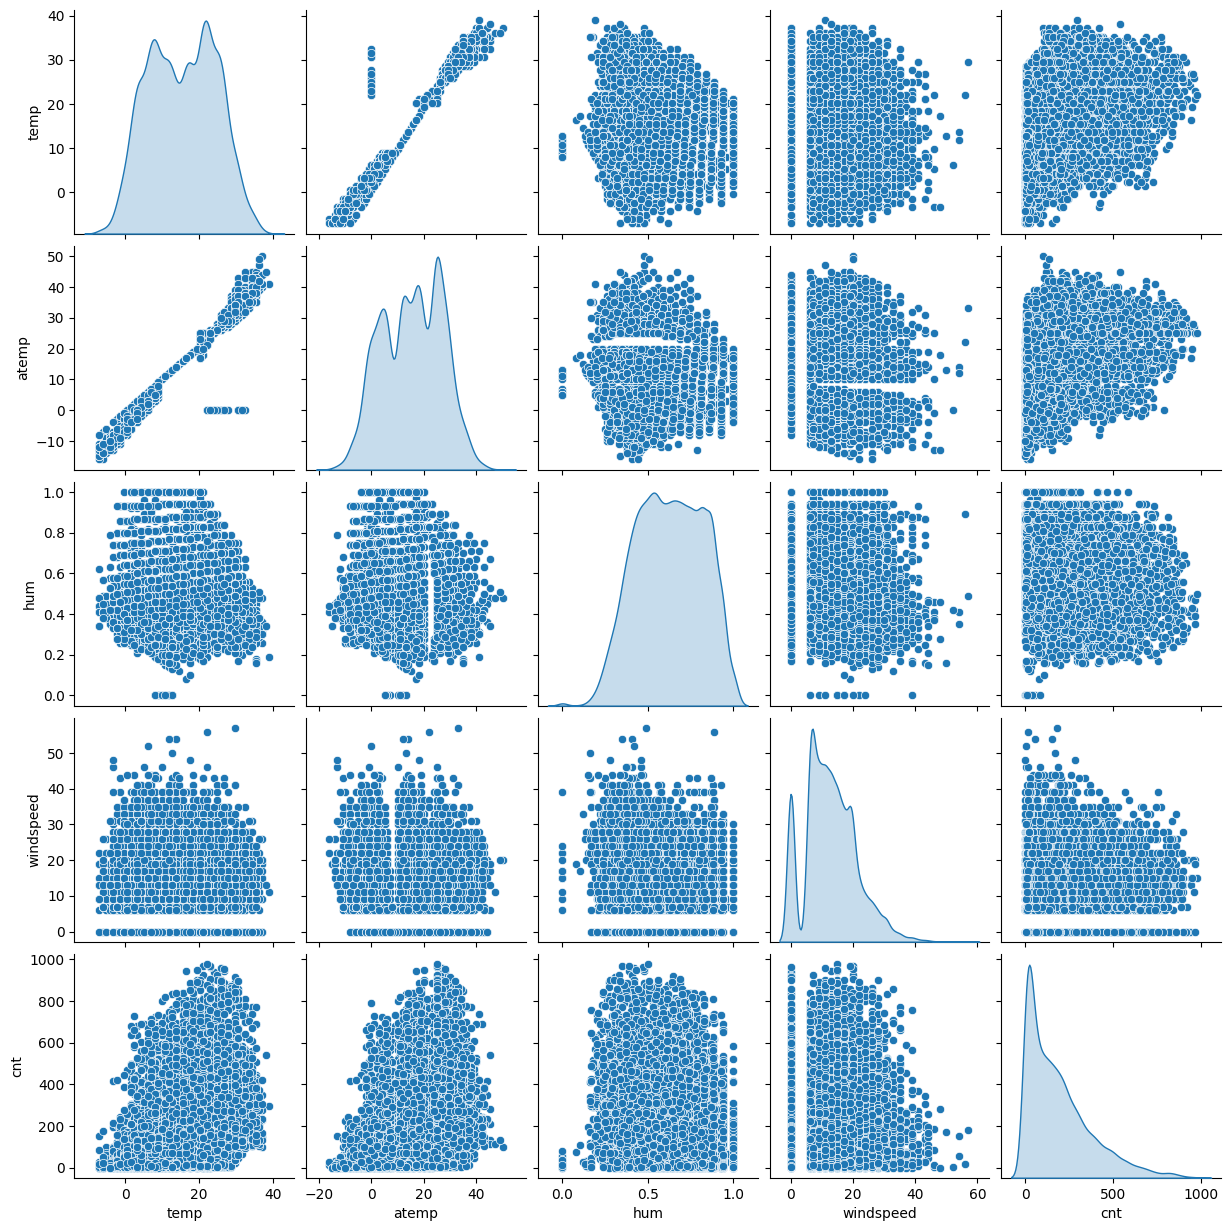

In [ ]:
plt.figure(figsize=(25,20))
train_numericas=train[["temp","atemp","hum","windspeed","cnt"]]

sns.pairplot(train_numericas,diag_kind="kde")
plt.show()

Luego, usarermos diagramas de cajas para observar la distribución de las variables categóricas. A primera vista el resultado nos muestra que la distribución de la variable "weekday" tiende a ser uniformemente distribuida para todos los días. Una primera hipótesis es que esta variable puede no tener peso significativo en el modelo que vayamos a crear.

<Axes: xlabel='time_of_day', ylabel='cnt'>

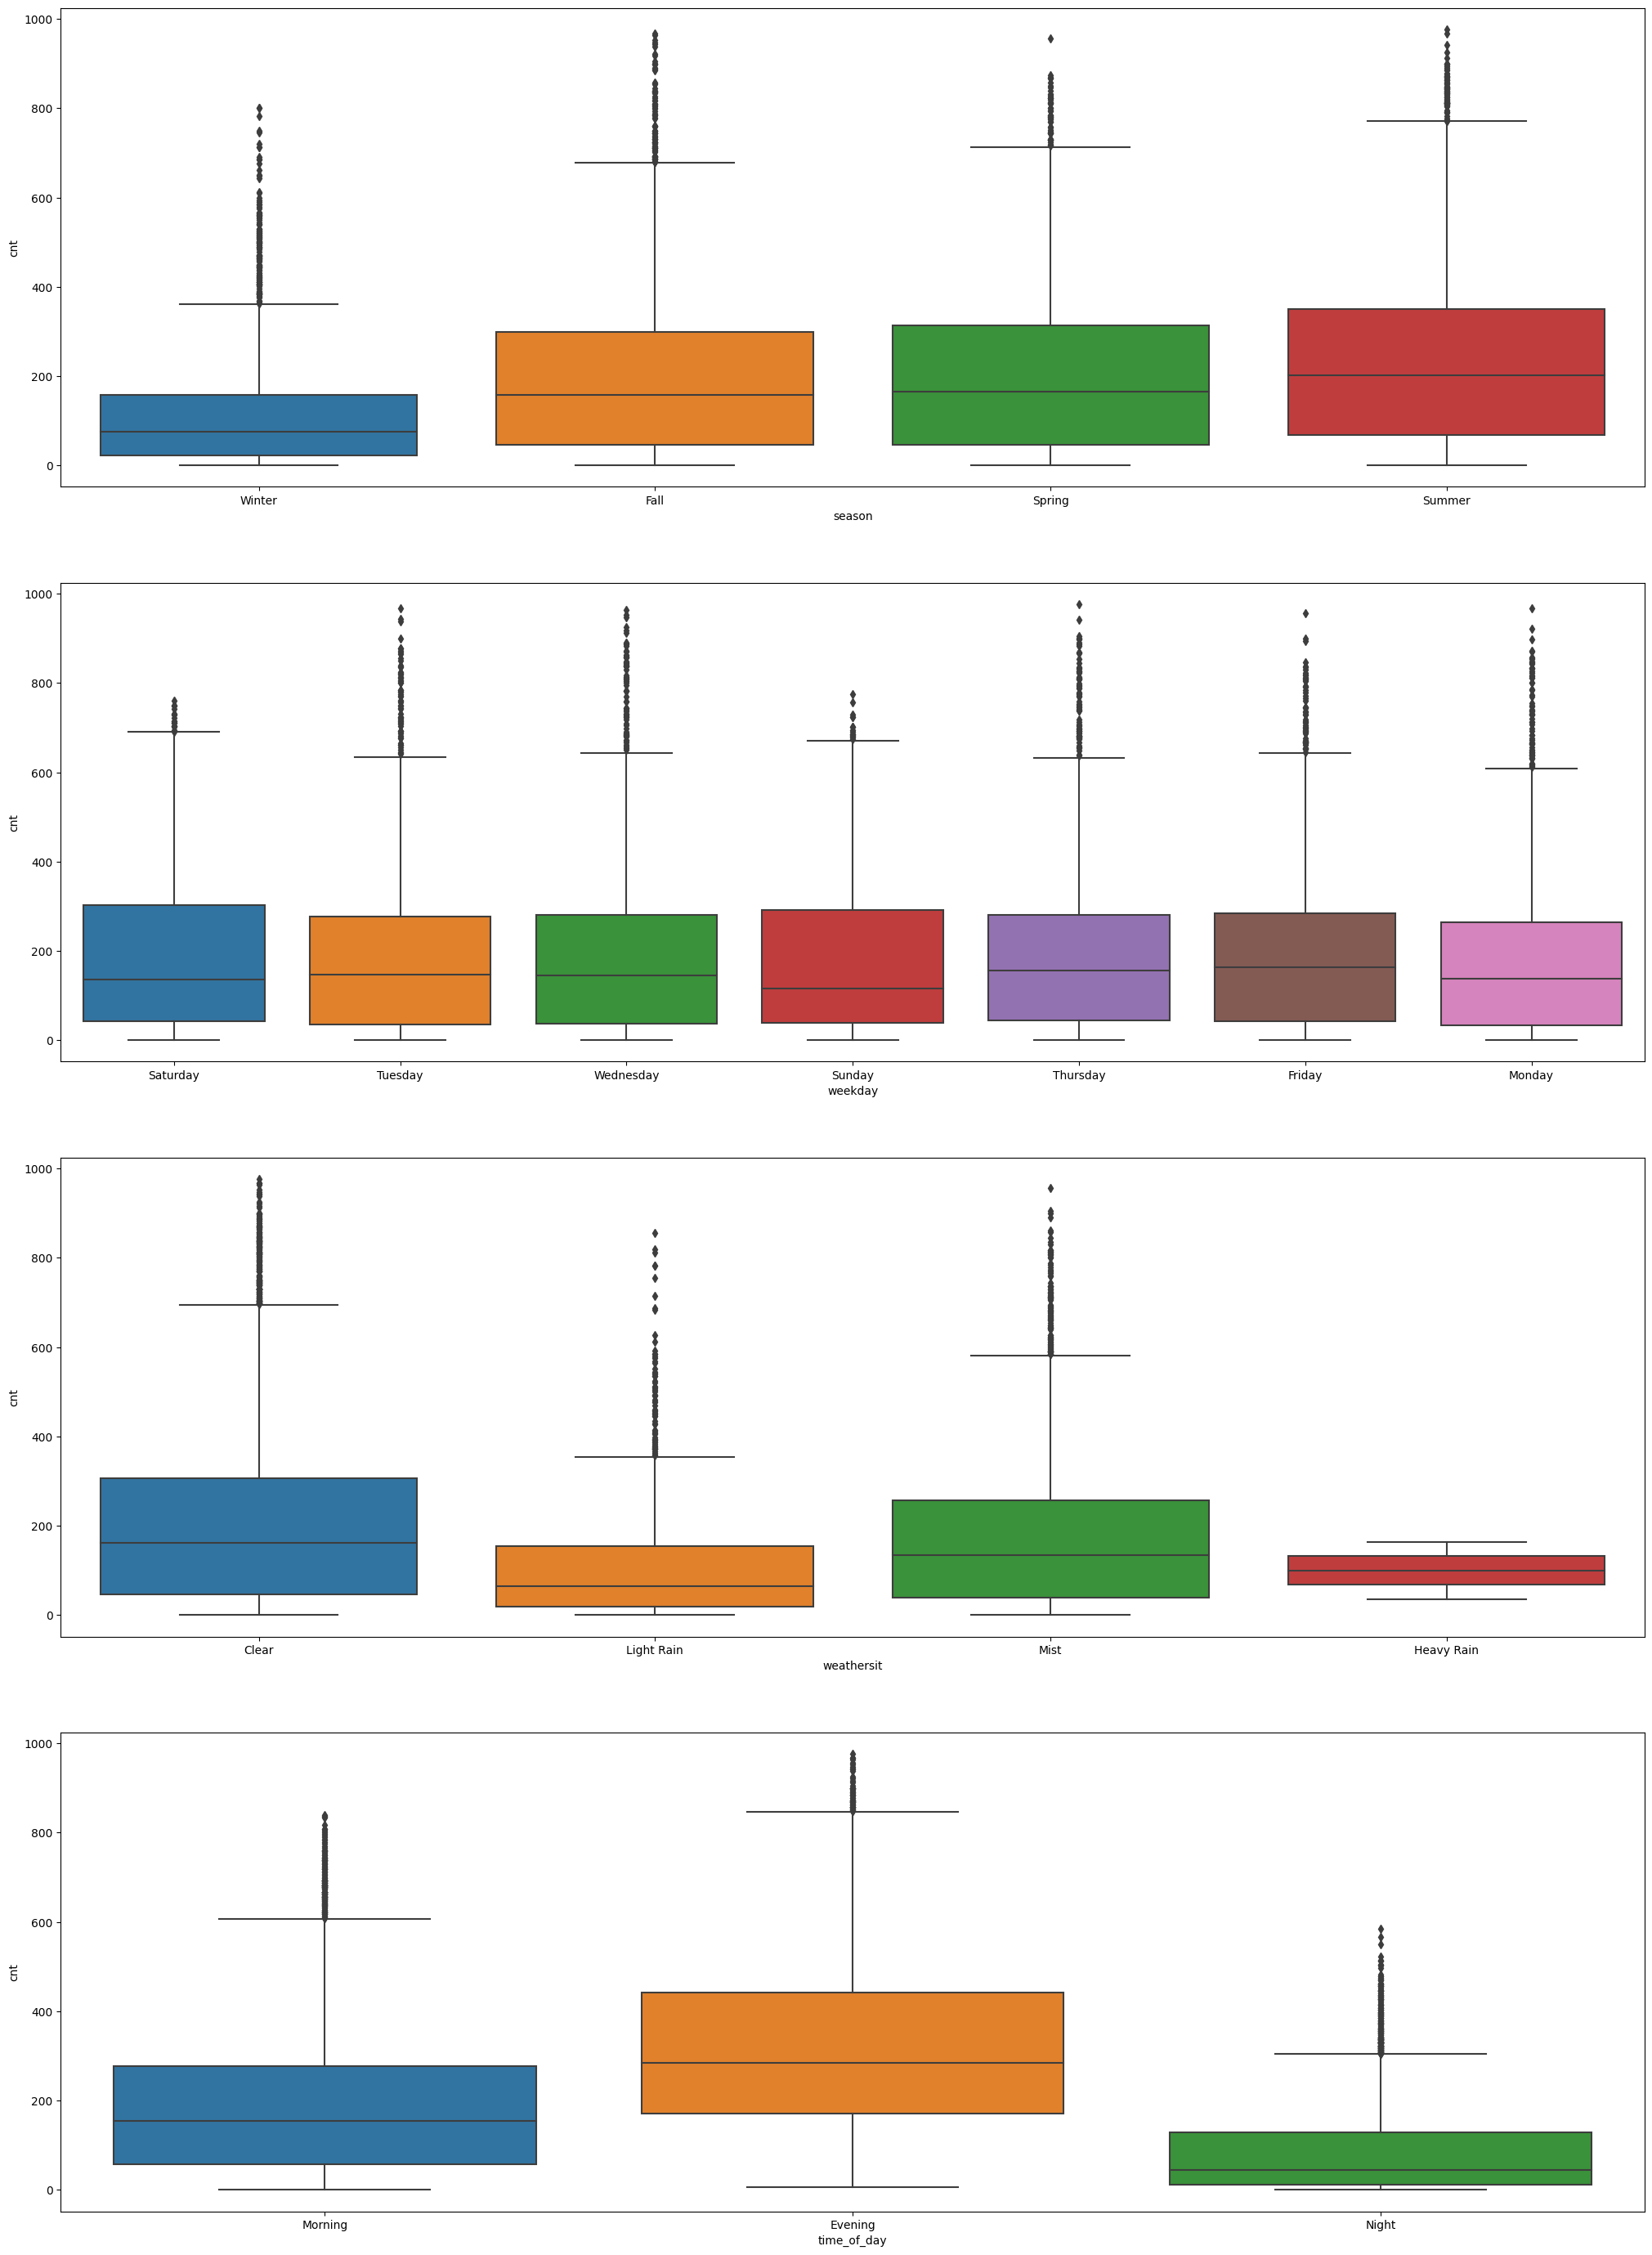

In [ ]:
plt.figure(figsize=(25,35))
plt.subplot(4,1,1)
sns.boxplot(x="season",y="cnt",data=train)
plt.subplot(4,1,2)
sns.boxplot(x="weekday",y="cnt",data=train)
plt.subplot(4,1,3)
sns.boxplot(x="weathersit",y="cnt",data=train)
plt.subplot(4,1,4)
sns.boxplot(x="time_of_day",y="cnt",data=train)

A continuación podemos observar le heatmap. A primera vista observamos que entre las variables no hay mucha colinealidad excepto entre las variables "temp" y atemp" cuya correlación es casi de 1. Este comportamiento también lo observamos en el pairplot inicial.

<ipython-input-17-b34e1fe5ad34>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cmap="coolwarm")


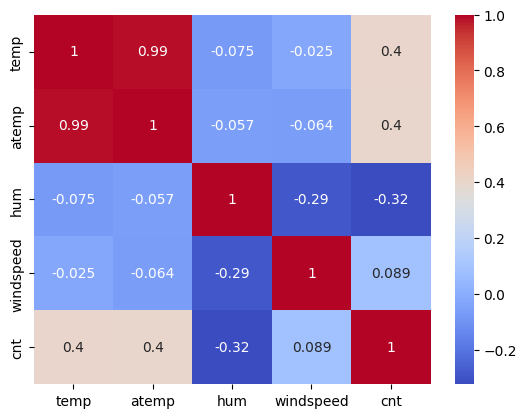

In [ ]:
sns.heatmap(train.corr(),annot=True,cmap="coolwarm")
plt.show()

##Exploración profunda de datos

Ejecutamos el reporte de pandas profiling para hacer un análisis exploratorio profundo de los datos.

In [ ]:
#Generamos un reporte de pandas profiling
report = train.profile_report(html={'style':{'full_width':True}})
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##Preparación de los datos

Empezamos la preparación de los datos para el modelado

In [ ]:
#Eliminamos los duplicados
train=train.drop_duplicates()

In [ ]:
#Creamos una copia
train_nuevo=train.copy()

In [ ]:
#Definimos la variable target
target="cnt"

Preparamos los datos de entrenamiento, separando características de la variable objetivo.



In [ ]:
X_train,Y_train=train_nuevo.drop([target],axis=1),train_nuevo[target]

In [ ]:
X_train

,season,weekday,weathersit,temp,atemp,hum,windspeed,time_of_day
335,Winter,Saturday,Clear,1.40,-2.9980,0.55,15.0013,Morning
7035,Fall,Tuesday,Clear,16.44,17.0000,0.42,7.0015,Evening
8051,Fall,Wednesday,Light Rain,13.62,13.9970,1.00,15.0013,Night
2133,Spring,Sunday,Mist,13.62,13.9970,0.31,0.0000,Evening
8485,Winter,Sunday,Clear,1.40,-0.9982,0.75,7.0015,Morning
...,...,...,...,...,...,...,...,...
11284,Spring,Friday,Clear,13.62,13.9970,0.88,6.0032,Morning
11964,Spring,Friday,Clear,23.02,24.9992,0.34,8.9981,Evening
5390,Summer,Wednesday,Clear,29.60,32.0018,0.43,19.0012,Morning
860,Winter,Tuesday,Clear,3.28,-2.9980,0.65,27.9993,Morning


In [ ]:
Y_train

335       72
7035     518
8051       3
2133     172
8485       1
        ... 
11284    359
11964    812
5390     189
860      100
15795    779
Name: cnt, Length: 13873, dtype: int64

Preparamos los datos de testeo, igualmente separamos caracteristicas de variable objetivo.

In [ ]:
new_test=test.copy()

In [ ]:
new_test=new_test.drop_duplicates()

In [ ]:
X_test,Y_test=new_test.drop([target],axis=1), new_test[target]

In [ ]:
X_test

,season,weekday,weathersit,temp,atemp,hum,windspeed,time_of_day
12830,Summer,6,Clear,29.60,30.0020,0.27,12.9980,Evening
8688,Winter,1,Clear,3.28,-0.9982,0.41,15.0013,Night
7091,Fall,5,Clear,7.04,3.9980,0.66,19.0012,Night
12230,Spring,2,Clear,28.66,30.9986,0.52,23.9994,Evening
431,Winter,4,Clear,4.22,-0.9982,0.56,26.0027,Night
...,...,...,...,...,...,...,...,...
6759,Fall,5,Mist,18.32,18.9998,0.94,11.0014,Morning
13989,Summer,6,Light Rain,22.08,22.9994,0.78,12.9980,Night
173,Winter,6,Mist,1.40,-4.0012,0.59,23.9994,Morning
16192,Fall,1,Clear,14.56,15.0002,0.77,11.0014,Morning


In [ ]:
Y_test

12830    425
8688      88
7091       4
12230    526
431       13
        ... 
6759      17
13989     85
173       98
16192    266
8211     267
Name: cnt, Length: 3475, dtype: int64

Separamos tipos de variables entre categóricas y numéricas.

In [ ]:
cat_var=["season","weekday","weathersit","time_of_day"]

In [ ]:
num_var=["temp","atemp","hum","windspeed"]

##Funciones Complementarias

El arreglo de la columna weekday que hicimos en un principio, lo convertimos en una función para poder integrarlo en el pipeline de a continuación.

In [ ]:
def arreglo_dias(df):
  for column in df.columns:
    if column=="weekday":
      df["weekday"]=df["weekday"].replace([0],[7])
      df["weekday"]=df["weekday"].replace([1,2,3,4,5,6,7],["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
  return df

#Modelamiento

##Creación de pipelines

En los tres escenarios usaremos StandardScaler() para la estandarización de variables numericas dada su capacidad para manejar características con distribuciones asimétricas o con una media y varianza significativamente diferentes.

In [ ]:
num_transformer= Pipeline(
    steps=[
        ("scaler_std", StandardScaler())
    ]

)

Para las variables categóricas primero aplicaremos la función que convierte los días en numéricos a palabras. Luego usaremos OneHotEncoder() para procesar las variables categóricas.

In [ ]:
cat_transformer=Pipeline(
    steps=[
        ("imputer", FunctionTransformer(arreglo_dias, validate=False)),
        ("encoder",OneHotEncoder(handle_unknown="ignore"))
    ]
)

Finalmente construimos todo el pipeline de preprocesamiento de datos, tanto para numéricas, como para categóricas.

In [ ]:
preprocessor= ColumnTransformer(
    transformers=[
        ("cat",cat_transformer,cat_var),
        ("num",num_transformer,num_var)

    ]
)

##Regresión Polinomial Grado 2, 3 y 4

Ejecutamos la regresión polinomial de grados 2,3 y 4. En este caso realizamos una regresión polinomial donde vamos a variar el grado desde 2 hasta 4. Para encontrar cual es el mejor modelo, usaremos GridSearchCV, el cual nos va a decir cual de los tres es el mejor grado. Para esto usaremos como métrica minimizar el "neg_mean_squared_error". Adicionalmente, haremos validación cruzada con 5 pliegues.

In [ ]:
EstimadoresRP=[
    ("transform",preprocessor),
    ("polinomial",PolynomialFeatures()),
    ('regression', LinearRegression())
]

EstimadoresRPPipeline=Pipeline(EstimadoresRP)

parameters_RP = {
              'polinomial__degree':[2,3,4],
              }

grid_search_RP = GridSearchCV(EstimadoresRPPipeline, parameters_RP,verbose=2, scoring='neg_mean_squared_error', cv=5)

grid_search_RP.fit(X_train,Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ...............................polinomial__degree=2; total time=   0.5s
[CV] END ...............................polinomial__degree=2; total time=   0.3s
[CV] END ...............................polinomial__degree=2; total time=   0.3s
[CV] END ...............................polinomial__degree=2; total time=   0.4s
[CV] END ...............................polinomial__degree=2; total time=   0.3s
[CV] END ...............................polinomial__degree=3; total time=  10.4s
[CV] END ...............................polinomial__degree=3; total time=   9.8s
[CV] END ...............................polinomial__degree=3; total time=   9.4s
[CV] END ...............................polinomial__degree=3; total time=  10.3s
[CV] END ...............................polinomial__degree=3; total time=  10.3s
[CV] END ...............................polinomial__degree=4; total time=16.7min
[CV] END ...............................polinomia

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          FunctionTransformer(func=<function arreglo_dias at 0x7d0409e6f130>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['season',
                                                                          'weekday',
                                                                          'weathersit',
                                                                          'time_of_day']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler_std',
                                                                                          StandardScaler())]),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'])])),
                                       ('polinomial', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'polinomial__degree': [2, 3, 4]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_search_RP.best_params_

{'polinomial__degree': 4}

In [ ]:
#Obtenemos el mejor modelo
best_model_RP=grid_search_RP.best_estimator_

In [ ]:
y_pred_train_RP=best_model_RP.predict(X_train)
y_pred_test_RP=best_model_RP.predict(X_test)

##Regresión Lasso

Ejecutamos la regresión lineal con regularización de tipo lasso. En este caso usaremos GridSearchCV para encontrar las mejores caracteristicas y al mismo tiempo hacer validación cruzada. En el parámetro scoring usamos "neg_mean_squared_error" ya que, como es la métrica con la que venimos trabajando, pues es la que queremos minimizar. Por otro lado, usaremos 20 pliegues para la validación cruzada.

In [ ]:

EstimadoresLasso=[
    ("transform",preprocessor),
    ('regression', Lasso())
]

EstimadoresLassoPipeline=Pipeline(EstimadoresLasso)

parametros={
    'regression__alpha':[0.1,1,2,3,4,5],

}

grid_search_Lasso=GridSearchCV(EstimadoresLassoPipeline,parametros,scoring='neg_mean_squared_error', cv=20)

grid_search_Lasso.fit(X_train,Y_train)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          FunctionTransformer(func=<function arreglo_dias at 0x7d0409e6f130>)),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['season',
                                                                          'weekday',
                                                                          'weathersit',
                                                                          'time_of_day']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler_std',
                                                                                          StandardScaler())]),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed'])])),
                                       ('regression', Lasso())]),
             param_grid={'regression__alpha': [0.1, 1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search_Lasso.best_params_


{'regression__alpha': 0.1}

In [ ]:
best_model_Lasso=grid_search_Lasso.best_estimator_

y_pred_train_Lasso=best_model_Lasso.predict(X_train)
y_pred_test_Lasso=best_model_Lasso.predict(X_test)

#Evaluación

## Evaluación Modelos Datos Train

In [ ]:
#Metricas para el resultado de Lasso con datos de train
RMSE_Lasso_train=mean_squared_error(Y_train,y_pred_train_Lasso,squared=False).round()
MAE_Lasso_train=mean_absolute_error(Y_train,y_pred_train_Lasso).round()
r2_Lasso_train=r2_score(Y_train,y_pred_train_Lasso)

In [ ]:
#Metricas para el resultado de regresión polinomial con datos de train
RMSE_RP_train=mean_squared_error(Y_train,y_pred_train_RP,squared=False).round()
MAE_RP_train=mean_absolute_error(Y_train,y_pred_train_RP).round()
r2_RP_train=r2_score(Y_train,y_pred_train_RP)

In [ ]:
resultados_train={
    "Modelo":["Lasso", "Polinomial"],
    "RMSE":[RMSE_Lasso_train,RMSE_RP_train],
    "MAE":[MAE_Lasso_train,MAE_RP_train],
    "R2":[r2_Lasso_train,r2_RP_train]
}

df_resultados_train=pd.DataFrame(resultados_train)
df_resultados_train

,Modelo,RMSE,MAE,R2
0,Lasso,138.0,103.0,0.428490
1,Polinomial,122.0,92.0,0.548346


##Evaluación Modelos Datos Test

In [ ]:
#Metricas para el resultado de Lasso con datos de test
RMSE_Lasso_test=mean_squared_error(Y_test,y_pred_test_Lasso,squared=False).round()
MAE_Lasso_test=mean_absolute_error(Y_test,y_pred_test_Lasso).round()
r2_Lasso_test=r2_score(Y_test,y_pred_test_Lasso)

In [ ]:
#Metricas para el resultado de regresión polinomial con datos de test
RMSE_RP_test=mean_squared_error(Y_test,y_pred_test_RP,squared=False).round()
MAE_RP_test=mean_absolute_error(Y_test,y_pred_test_RP).round()
r2_RP_test=r2_score(Y_test,y_pred_test_RP)

In [ ]:
resultados={
    "Modelo":["Lasso", "Polinomial"],
    "RMSE":[RMSE_Lasso_test,RMSE_RP_test],
    "MAE":[MAE_Lasso_test,MAE_RP_test,],
    "R2":[r2_Lasso_test,r2_RP_test]
}

df_resultados=pd.DataFrame(resultados)
df_resultados

,Modelo,RMSE,MAE,R2
0,Lasso,1.330000e+02,9.900000e+01,4.442694e-01
1,Polinomial,1.520444e+12,2.579248e+10,-7.298517e+19


##Respuestas Análisis Evaluación

 **¿Cuál modelo ofrece el mejor rendimiento sobre el conjunto test?**

Si damos un primer vistazo inicial a los datos de entrenamiento, diriamos que el modelo polinomial es mejor. Sin embargo, al pasar a los datos de test, nos damos cuenta que la regresión polinomial tiene un overfitting gigante debido a la gran diferencia que hay entre sus métricas de entrenamiento y test. Por lo tanto, el modelo donde usamos regresión regularizada de tipo Lasso resulta ser el mejor modelo. Si observamos sus métricas se mantienen muy similares entre entrenamiento y test. De hecho con el conjunto de datos de prueba el rendimiento del modelo Lasso Mejoró notablemente.


**¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?**

Lo primero que podemos notar es que el modelo de regresión polinomial de grado 4 que fue el de mejor desempeño, terminó ser un modelo con un overfitting gigante. En este caso podríamos agregarle una regularización al modelo polinomial para sacar las caracteristicas que no son tan importantes y así mejorar su rendimiento. Además que el tiempo de computo fue demasiado para la regularización de tipo 4.

Por otro lado, la regresión con regularización tipo Lasso resultó ser muy exitosa. Si bien en entrenamiento la regresión polinomial mostró mejores métricas, al pasar al conjunto de pruebas Lasso demostró que el eliminar las caracteristicas menos importantes sí sirve para obtener un buen rendimiento del modelo.


#Variables Más Importantes Para el Modelo

In [ ]:
coeficientes=best_model_Lasso["regression"].coef_
coeficientes

array([  53.664338  ,   15.83267195,   -4.57446708,   -7.59000321,
          3.63374875,   -5.66834472,    4.19934889,   -8.90729471,
         -0.        ,   -1.04731527,    0.37286604,    4.90526642,
         -0.        ,  -38.39036473,    0.        ,   83.09202308,
         -0.        , -105.06824051,   39.78105134,   22.06705558,
        -28.98851044,   -2.31102251])

In [ ]:
# Coeficientes de Lasso del mejor modelo
lasso_coefs = best_model_Lasso.named_steps['regression'].coef_

# Accedemos al transformador de columna en el mejor modelo
preprocessor_data = best_model_Lasso.named_steps['transform']

# Accedemos a las características numéricas
num_features_transformed = num_var

# Para las características categóricas, obtenemos los nombres después de OneHotEncoder
cat_feature_names = preprocessor_data.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_var)

# Combinamos los nombres de características numéricas y categóricas
all_features = num_features_transformed + list(cat_feature_names)

# Creamos un DataFrame para visualizar los coeficientes y las características
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': lasso_coefs
})

feature_importance.sort_values(by="Coefficient", ascending=False)

,Feature,Coefficient
15,weathersit_Clear,83.092023
0,temp,53.664338
18,weathersit_Mist,39.781051
19,time_of_day_Evening,22.067056
1,atemp,15.832672
11,weekday_Sunday,4.905266
6,season_Summer,4.199349
4,season_Fall,3.633749
10,weekday_Saturday,0.372866
8,weekday_Friday,-0.000000


 **¿Qué interpretación de cara al problema puedes dar?**

 A primera vista podemos detectar que las caracteristicas que más afectan el resultado, son el clima despejado y la lluvia ligera. Esto nos dice que en un clima despejado la demanda de bicicletas va a aumentar y por lo tanto, se debe tener un mayor número de bicicletas disponibles. Por otro lado, cuando el clima sea de lluvia ligera, el alquiler de bicicletas va a disminuir y por lo tanto, no se van a requerir tantas bicicletas disponibles. Un dato que apoya esta teoría es que la temperatura es la segunda caracteristica que más impacta la variable objetivo positivamente. Es decir que a mayor temperatura, más bicicletas se van a alquilar, lo que coincide con el clima despejado.

 Otro insight que podemos obtener de este reporte es que el número de biciletas rentadas es mayor de noche que en la mañana. Lo que implica que de noche se requerirán un mayor número de bicicletas disponibles.

 En cuanto a los días de la semana estos no reportan un peso significativo a excepción del domingo y jueves. En este caso los domingos suele aumentar el número de bicicletas rentadas, mientras que los jueves el número de alquileres se reduce significativamente (Es la segunda característica que más afecta el modelo negativamente). Sería importante tener el contexto social y geográfico, ya que una primera hipótesis podría ser que los domingos que son días familiares y que la gente suele salir al pasear el alquiler aumente. Mientras que los jueves que podrían ser días de vida nocturna, el alquiler disminuya considerablemente.